In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from tabulate import tabulate
import iexfinance as iex
import chart_studio.plotly as py
from iexfinance.refdata import get_symbols
from iexfinance.stocks import get_historical_data
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import zscore
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [7]:
def textclean(Text):
    Text = Text.str.replace('http\S+|www.\S+|—','', case=False)
    Text = Text.str.replace("(<br/>)", "")
    Text = Text.str.replace('(<a).*(>).*(</a>)', '')
    Text = Text.str.replace('(&amp)', '')
    Text = Text.str.replace('(&gt)', '')
    Text = Text.str.replace('(&lt)', '')
    Text = Text.str.replace('(\xa0)', ' ') 
    Text = Text.str.replace('[^A-Za-z ]+', ' ')
    Text = Text.str.replace('[^A-Za-z ]+', '')
    #Text = Text.str.replace('—', '')
    return Text

In [14]:
df = pd.read_csv("trump_tweets.csv") 
df

source                                               text  \
0       Twitter for iPhone  LOUISIANA — Tomorrow you will head to the poll...   
1       Twitter for iPhone  Louisiana REPUBLICANS thank you for a great ev...   
2       Twitter for iPhone  “I never saw so many subpoenas!” @ShannonBream...   
3       Twitter for iPhone  So funny to watch Steve Kerr grovel and pander...   
4       Twitter for iPhone                                    WHERE’S HUNTER?   
...                    ...                                                ...   
15248  Twitter for Android  Well the year has officially begun. I have man...   
15249  Twitter for Android  @sprinklermanus: @CNN @realDonaldTrump they're...   
15250  Twitter for Android  @jallenaip: Hillary said she was in a Fog of W...   
15251   Twitter for iPhone  Happy New Year from #MarALago! Thank you to my...   
15252   Twitter for iPhone      #HappyNewYearAmerica! https://t.co/EeQb8PDrUe   

            created_at  retweet_count  favorite_count is_retweet        id_str  
0      10/12/2019 3:49           9706           35425      False  1.182870e+18  
1      10/12/2019 3:48          10626           40844      False  1.182870e+18  
2      10/12/2019 3:25          15523           56841      False  1.182860e+18  
3      10/12/2019 3:25          20293           99524      False  1.182860e+18  
4      10/12/2019 2:58          26280          110222      False  1.182850e+18  
...                ...            ...             ...        ...           ...  
15248   1/1/2016 23:00           2642            8495      False  6.830600e+17  
15249   1/1/2016 21:29            933            3330      False  6.830370e+17  
15250    1/1/2016 6:08           2721            7490      False  6.828050e+17  
15251    1/1/2016 6:07           1948            8258      False  6.828050e+17  
15252    1/1/2016 5:18           3434            9143      False  6.827930e+17  

[15253 rows x 7 columns]

In [15]:
df = df.drop(columns=["source","id_str"])
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.rename(columns={'created_at': 'Date'})
df = df[~df['text'].str.contains("RT @")]
df['text'] = textclean(df['text'])
sentiment = df.apply(lambda x : analyzer.polarity_scores(x['text']), axis=1)
df['Compound'] =sentiment.apply(lambda x : x.get('compound') )
df = df.reset_index(drop=True)
df

text                Date  \
0      LOUISIANA  Tomorrow you will head to the polls... 2019-10-12 03:49:00   
1      Louisiana REPUBLICANS thank you for a great ev... 2019-10-12 03:48:00   
2       I never saw so many subpoenas   ShannonBream ... 2019-10-12 03:25:00   
3      So funny to watch Steve Kerr grovel and pander... 2019-10-12 03:25:00   
4                                        WHERE S HUNTER  2019-10-12 02:58:00   
...                                                  ...                 ...   
12626  Well the year has officially begun  I have man... 2016-01-01 23:00:00   
12627   sprinklermanus   CNN  realDonaldTrump they re... 2016-01-01 21:29:00   
12628   jallenaip  Hillary said she was in a Fog of W... 2016-01-01 06:08:00   
12629  Happy New Year from  MarALago  Thank you to my... 2016-01-01 06:07:00   
12630                              HappyNewYearAmerica   2016-01-01 05:18:00   

       retweet_count  favorite_count is_retweet  Compound  
0               9706           35425      False    0.8730  
1              10626           40844      False    0.8798  
2              15523           56841      False   -0.9153  
3              20293           99524      False   -0.4779  
4              26280          110222      False    0.0000  
...              ...             ...        ...       ...  
12626           2642            8495      False    0.5955  
12627            933            3330      False    0.7351  
12628           2721            7490      False   -0.8360  
12629           1948            8258      False    0.9186  
12630           3434            9143      False    0.0000  

[12631 rows x 6 columns]

In [16]:
#df.to_csv('trump_tweeets_with_sentiment.csv')

In [17]:
df_china = df[(df['text'].str.contains("tariffs", case=False))]
df_china = df_china[(df_china['Compound'] < -0.5) | (df_china['Compound'] > 0.5)]
df_china


text                Date  \
125    Minutes  forgot  to report that we are helpin... 2019-10-06 23:54:00   
233   The U S  won a   Billion award from the World ... 2019-10-03 10:00:00   
575    on October  st we have agreed as a gesture of... 2019-09-11 23:17:00   
735    Brazil will allow more American Ethanol to en... 2019-09-03 02:37:00   
741    Brazil will allow more American Ethanol to en... 2019-09-02 21:58:00   
...                                                 ...                 ...   
6032  Very thankful for President Xi of China s kind... 2018-04-10 18:30:00   
6053  The United States hasn t had a Trade Surplus w... 2018-04-07 18:03:00   
6200  The European Union wonderful countries who tre... 2018-03-10 21:29:00   
6210  Spoke to PM  TurnbullMalcolm of Australia  He ... 2018-03-09 22:48:00   
6240  If the E U  wants to further increase their al... 2018-03-03 17:53:00   

      retweet_count  favorite_count is_retweet  Compound  
125           20112           71366      False    0.8442  
233           25811          109082      False    0.7655  
575           10299           51280      False    0.7906  
735           14075           67742      False    0.6808  
741            5539           21596      False    0.6808  
...             ...             ...        ...       ...  
6032          22531          106429      False    0.9558  
6053          22193           90487      False   -0.6705  
6200          23972           99649      False   -0.7236  
6210          17200           78494      False    0.9092  
6240          30869          124849      False    0.6369  

[87 rows x 6 columns]

In [18]:
df_closing_price = pd.read_csv("closing_price_data.csv") 
df_closing_price['Date'] = pd.to_datetime(df_closing_price['Date'])
df_closing_price

Date         SPY        SOXX       SOYB       CARZ
0   2016-01-04  201.020004   88.800003  17.230000  35.230000
1   2016-01-05  201.360001   87.959999  17.190001  35.020000
2   2016-01-06  198.820007   84.919998  17.260000  33.830002
3   2016-01-07  194.050003   82.540001  17.320000  32.950001
4   2016-01-08  191.919998   81.349998  17.330000  32.750000
..         ...         ...         ...        ...        ...
946 2019-10-07  293.079987  212.240005  15.680000  31.139999
947 2019-10-08  288.529999  205.669998  15.730000  30.900000
948 2019-10-09  291.269989  209.029999  15.780000  31.139999
949 2019-10-10  293.239990  211.070007  15.790000  31.389999
950 2019-10-11  296.279999  216.050003  15.920000  32.330002

[951 rows x 5 columns]

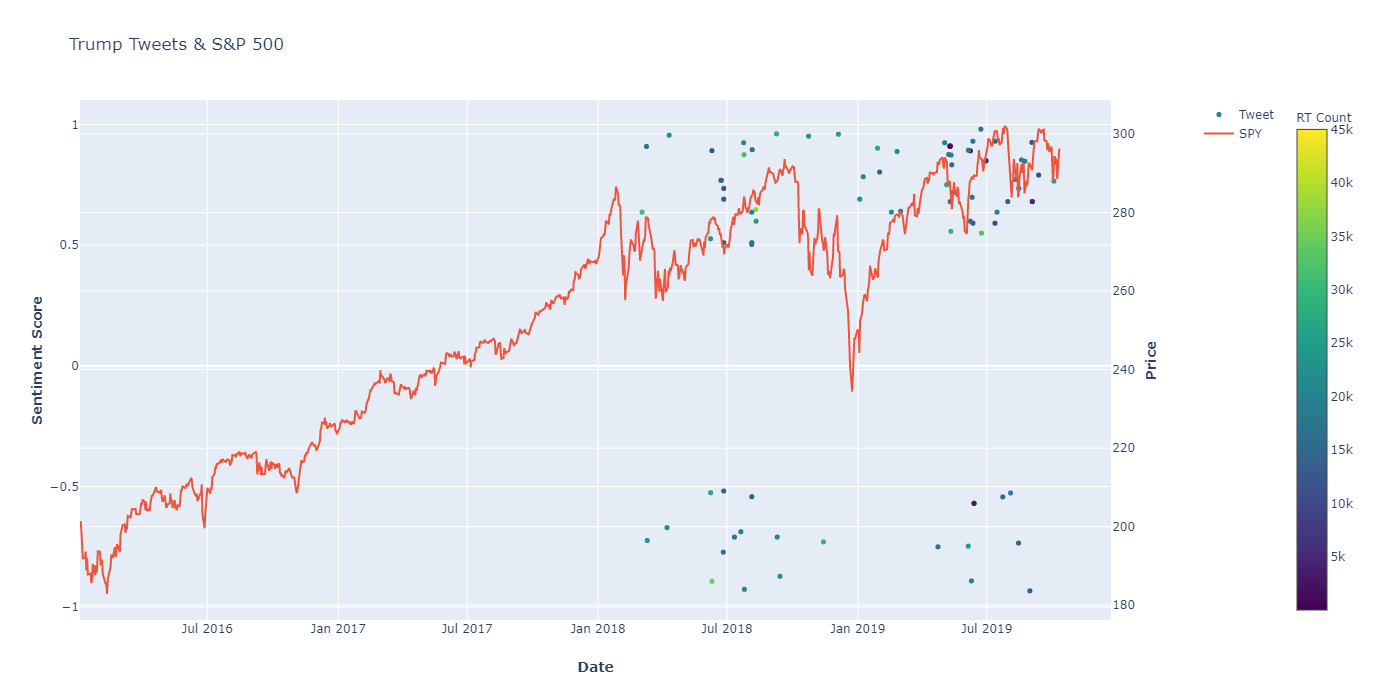

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
    x = df_china.Date, 
    y = df_china.Compound, 
    name="Tweet", 
    mode = 'markers', 
        marker=dict(
        size=5,
        cmax=45000,
        cmin=50,
        color=df_china.retweet_count,
        colorbar=dict(
            title="RT Count",x=1.1
        ),
        colorscale="Viridis"
    ),
    hovertext=df_china.text),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = df_closing_price['Date'], y=df_closing_price['SPY'], name="SPY"),
    secondary_y=True,
)

#fig.add_trace(
#    go.Scatter(x = df_closing_price.Date, y=df_closing_price['SOXX'], name="SOXX"),
#    secondary_y=True,
#)

# Add figure title
fig.update_layout(
    title_text="Trump Tweets & S&P 500",
    width=1400,
    height=700,
)


# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Sentiment Score</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Price</b>", secondary_y=True)

fig.show()



In [27]:
df_wework = pd.read_csv("wework2.csv") 
df_wework = df_wework.drop(['Unnamed: 0'], axis=1)
df_wework['text'] = textclean(df_wework['text'])
df_wework = df_wework[(df_wework.text.str.contains("wework", case= False, na=False)) & (df_wework['text'].str.contains("IPO", case=False, na=False))]     
df_wework['timestamp'] = pd.to_datetime(df_wework['timestamp'])
df_wework = df_wework.rename(columns={'timestamp': 'Date'})
df_wework = df_wework[~df_wework['text'].str.contains("RT @")]
df_wework = df_wework.drop_duplicates(subset='text', keep="first")
sentiment = df_wework.apply(lambda x : analyzer.polarity_scores(x['text']), axis=1)
df_wework['Compound'] =sentiment.apply(lambda x : x.get('compound') )
df_wework.sort_values(by=['Date'], inplace=True, ascending=True)
df_wework = df_wework.reset_index(drop=True)
df_wework


is_retweet  likes  retweets  \
0              0      0         0   
1              0      1         1   
2              0      0         0   
3              0      0         0   
4              0      0         0   
...          ...    ...       ...   
9237           0      0         0   
9238           0    385        42   
9239           0      1         1   
9240           0      1         0   
9241           0      1         0   

                                                   text                Date  \
0     WeWork is in talks with banks about arranging ... 2019-06-01 01:14:18   
1      From Dara Khosrowshahi s Uber to Adam Neumann... 2019-06-01 03:19:01   
2     Why WeWork Is Considering An IPO Despite Losin... 2019-06-01 06:08:02   
3     Why WeWork Is Considering An IPO Despite Losin... 2019-06-01 06:08:05   
4     Why WeWork Is Considering An IPO Despite Losin... 2019-06-01 06:08:08   
...                                                 ...                 ...   
9237  Remember that IPO valuation of like   Billion ... 2019-10-13 22:30:09   
9238  Did WeWork make any mention in their S  that w... 2019-10-13 22:34:26   
9239  Risky move by the SoftBank  although it will b... 2019-10-13 22:37:36   
9240                                 IPO CEO WeWork     2019-10-13 22:52:24   
9241  As expected  WeWork IPO debacle is now overtly... 2019-10-13 23:16:50   

            username  Compound  
0            soodoku    0.3818  
1          jaypalter    0.2023  
2          nipponme1    0.2924  
3          NipponBox    0.2924  
4         BuzzNippon    0.2924  
...              ...       ...  
9237      WingKing20    0.6486  
9238  Hipster_Trader    0.0000  
9239       romy_gill   -0.1027  
9240    Instawork_jp    0.0000  
9241     mikethebbop   -0.3612  

[9242 rows x 7 columns]

In [28]:
df_wework.max()

is_retweet                                                    0
likes                                                      2733
retweets                                                    563
text          you know wework is just waiting until after th...
Date                                        2019-10-13 23:16:50
username                                                 zysman
Compound                                                 0.9719
dtype: object

In [29]:
wework_bond_price = pd.read_csv("wework_bond.csv") 
wework_bond_price['Date'] = pd.to_datetime(wework_bond_price['Date'])
wework_bond_price = wework_bond_price[(wework_bond_price['Date'] > '2019-6-4')]
wework_bond_price

Date  The We Company - SR GLBL 144A 25 - Bond Price
278 2019-06-05                                         92.875
279 2019-06-06                                         93.500
280 2019-06-07                                         93.750
281 2019-06-10                                         95.000
282 2019-06-11                                         94.750
..         ...                                            ...
366 2019-10-09                                         81.750
367 2019-10-10                                         81.250
368 2019-10-11                                         90.500
369 2019-10-14                                         87.000
370 2019-10-15                                         87.000

[93 rows x 2 columns]

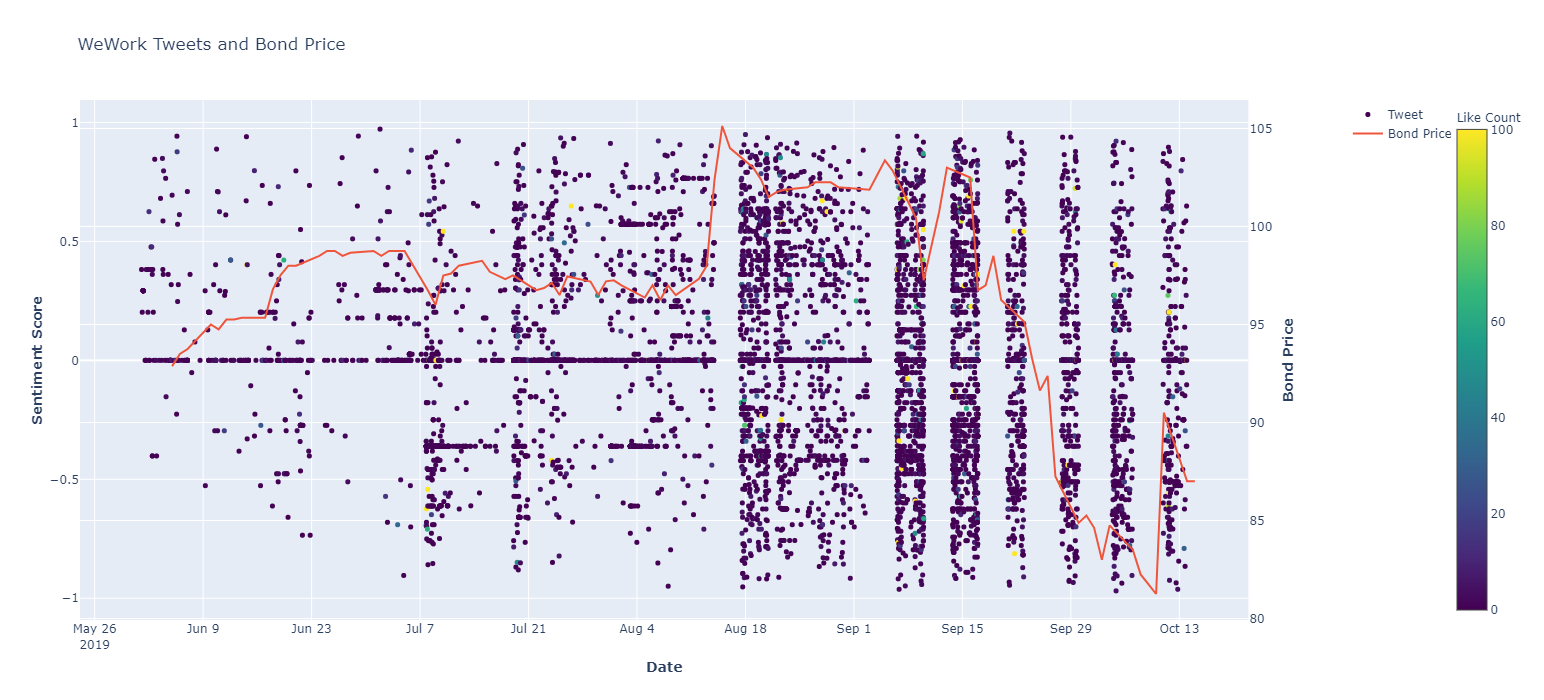

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
    x = df_wework.Date, 
    y = df_wework.Compound, 
    name="Tweet", 
    mode = 'markers', 
        marker=dict(
        size=5,
        cmax=100,
        cmin=0,
        color=df_wework.likes,
        colorbar=dict(
            title="Like Count",x=1.1
        ),
        colorscale="Viridis"
    ),
    hovertext=df_wework.text),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = wework_bond_price.Date, y=wework_bond_price['The We Company - SR GLBL 144A 25 - Bond Price'], name="Bond Price"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="WeWork Tweets and Bond Price",
    width=1400,
    height=700,
)


# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Sentiment Score</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Bond Price</b>", secondary_y=True)

fig.show()



In [33]:
df_musk = pd.read_csv("elon_all.csv") 
df_musk['text'] = textclean(df_musk['text'])
df_musk = df_musk.drop_duplicates(subset='text', keep="first")
df_musk = df_musk[~df_musk['text'].str.contains("RT @", na=False)]
df_musk = df_musk[(df_musk['is_retweet'] < 1)]
df_musk = df_musk[(df_musk['text'].str.contains("tesla",  na=False, case=False))]
df_musk = df_musk.drop(['Unnamed: 0'], axis=1)
df_musk = df_musk.rename(columns={'timestamp': 'Date'})
df_musk['Date'] = pd.to_datetime(df_musk['Date'])
df_musk.sort_values(by=['Date'], inplace=True, ascending=False)

sentiment = df_musk.apply(lambda x : analyzer.polarity_scores(x['text']), axis=1)
df_musk['Compound'] =sentiment.apply(lambda x : x.get('compound') )
df_musk = df_musk[(df_musk['Compound'] < -0.4) | (df_musk['Compound'] > 0.4)]
df_musk = df_musk[(df_musk['Date'] > '2017-1-1')]
df_musk = df_musk.reset_index(drop=True)
df_musk

username                Date  retweets  likes  is_retweet  \
0    elonmusk 2019-10-12 01:01:26       791  14294           0   
1    elonmusk 2019-10-02 22:16:45      2260  50511           0   
2    elonmusk 2019-10-02 22:12:57       223   3625           0   
3    elonmusk 2019-09-23 17:44:14       524   3637           0   
4    elonmusk 2019-09-16 17:35:58       195   2943           0   
..        ...                 ...       ...    ...         ...   
235  elonmusk 2017-03-10 02:50:57      6459  15724           0   
236  elonmusk 2017-02-23 12:22:31       865   3817           0   
237  elonmusk 2017-02-15 21:05:03     14810  50195           0   
238  elonmusk 2017-02-11 02:18:03        87    747           0   
239  elonmusk 2017-02-07 16:11:34        26    382           0   

                                                  text  Compound  
0    Now that Tesla V  with Smart Summon is out  Fu...    0.6124  
1    Over   Tesla Smart Summon uses in first few days     0.4019  
2    Thanks  Tesla team is the strongest it s ever ...    0.9246  
3    Hoping to open in Slovakia  Croatia  Serbia   ...    0.7096  
4    Feeling Lucky  Google tribute  or Hungry are  ...    0.9354  
..                                                 ...       ...  
235  Tesla will get the system installed and workin...    0.4588  
236                  Excellent Tesla Model X review       0.5719  
237  In appreciation  Tesla is providing all repair...    0.7650  
238  Sounds like the Tesla Powerwall  consumer  and...    0.6597  
239  Also  Tesla service can remove front trunk lin...    0.4404  

[240 rows x 7 columns]

In [34]:
df_musk.max()

username                                        elonmusk
Date                                 2019-10-12 01:01:26
retweets                                           27241
likes                                             172307
is_retweet                                             0
text          You re welcome  Thanks for buying a Tesla 
Compound                                          0.9698
dtype: object

In [35]:
tsla_price = pd.read_csv("TSLA.csv") 
tsla_price['Date'] = pd.to_datetime(tsla_price['Date'])
tsla_price = tsla_price[(tsla_price['Date'] > '2017-1-1')]
tsla_price = tsla_price.reset_index(drop=True)
tsla_price

Date        TSLA
0   2017-01-03  216.990005
1   2017-01-04  226.990005
2   2017-01-05  226.750000
3   2017-01-06  229.009995
4   2017-01-09  231.279999
..         ...         ...
696 2019-10-09  244.529999
697 2019-10-10  244.740005
698 2019-10-11  247.889999
699 2019-10-14  256.959991
700 2019-10-15  257.890015

[701 rows x 2 columns]

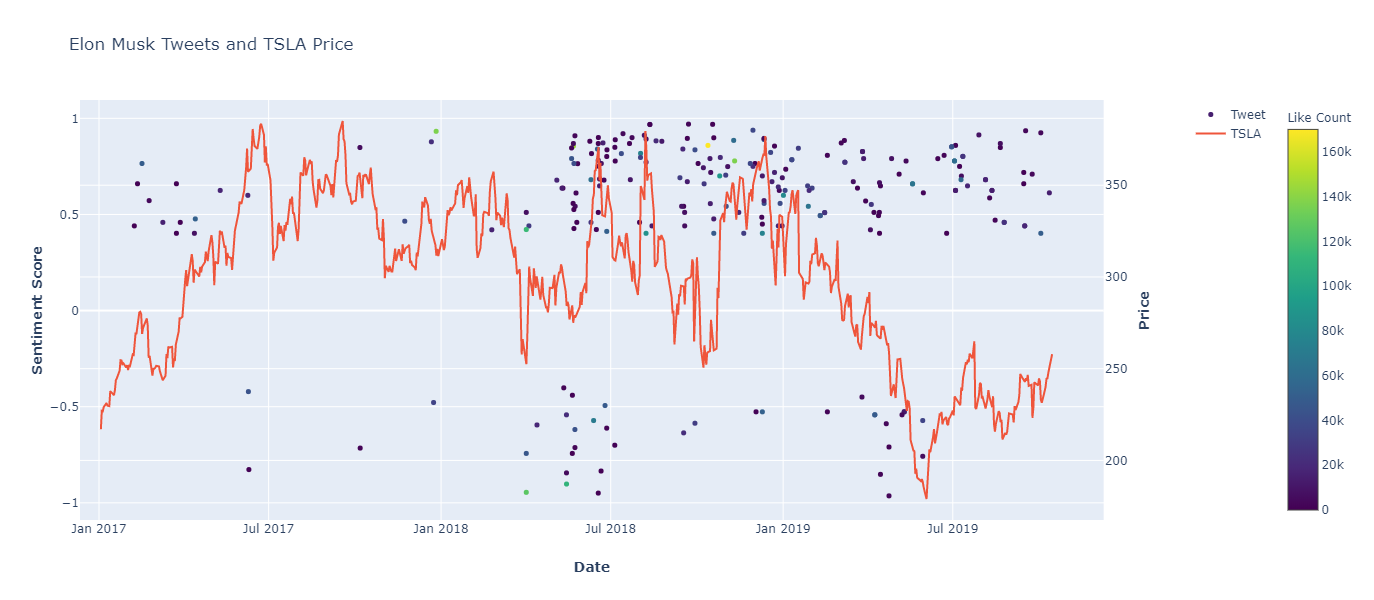

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(
    x = df_musk.Date, 
    y = df_musk.Compound, 
    name="Tweet", 
    mode = 'markers', 
        marker=dict(
        size=5,
        cmax=170000,
        cmin=0,
        color=df_musk.likes,
        colorbar=dict(
            title="Like Count",x=1.1
        ),
        colorscale="Viridis"
    ),
    hovertext=df_musk.text),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = tsla_price.Date, y=tsla_price['TSLA'], name="TSLA"),
    secondary_y=True,
)


# Add figure title
fig.update_layout(
    title_text="Elon Musk Tweets and TSLA Price",
    width=1200,
    height=600,
)


# Set x-axis title
fig.update_xaxes(title_text="<b>Date</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Sentiment Score</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Price</b>", secondary_y=True)

fig.show()

